In [4]:
from urllib.request import Request, urlopen
from urllib.error import URLError,HTTPError
from bs4 import BeautifulSoup
import requests
from	wordcloud import	WordCloud
from	konlpy.tag import	Okt
from	collections	import	Counter
import	matplotlib.pyplot as	plt
import	platform

In [5]:
url='https://medium.com/daangn/data/home'
html=requests.get(url)
soup=BeautifulSoup(html.text,'html.parser')
# print(soup)
urllist=[]
text1=[]
for page in soup.select('a.u-block'):
    url=f'{page["href"]}'
    html=requests.get(url)
    bs = BeautifulSoup(html.text, 'html.parser')
    urllist.append(url)
    print(url)
    print(type(url))

https://medium.com/daangn/%EC%8B%A0%EB%A2%B0%ED%95%A0-%EC%88%98-%EC%9E%88%EB%8A%94-%EC%A7%80%ED%91%9C-%EB%A7%8C%EB%93%A4%EA%B8%B0-bbf39dc4a6b3?source=collection_category---4------0-----------------------
<class 'str'>
https://medium.com/daangn/%EA%B3%B5%ED%95%99%EC%A0%81-%EA%B4%80%EC%A0%90%EC%9C%BC%EB%A1%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4-%EB%A7%8C%EB%93%A4%EA%B8%B0-aea44d0b7b7?source=collection_category---4------1-----------------------
<class 'str'>
https://medium.com/daangn/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B0%80%EC%B9%98%ED%99%94-%ED%8C%80%EC%9D%98-%EC%9D%BC%EC%83%81%EC%9D%84-%EB%A7%8C%EB%82%98%EB%B4%90%EC%9A%94-725f641f904d?source=collection_category---4------2-----------------------
<class 'str'>
https://medium.com/daangn/1%EC%A3%BC-1%EA%B0%9C-%EC%8B%A4%ED%97%98%ED%95%98%EB%8A%94-%ED%94%84%EB%A1%9C%EB%8D%95%ED%8A%B8-%ED%8C%80%EC%9D%B4-%EB%90%98%EB%8A%94-%EC%97%AC%EC%A0%95-b8a4c337a8e1?source=collection_category---4------3---------

In [58]:
# url=urllist[0]
# html=requests.get(url)
# bs = BeautifulSoup(html.text, 'html.parser')
# print(bs.text)
text_dan=[]
for i in range(len(urllist)):
    html=requests.get(urllist[i])
    bs = BeautifulSoup(html.text, 'html.parser')
    result=bs.text.replace('\n','').split(' ')
    
    for i in result:
        text_dan.append(i)
print(text_dan)
    


['데이터', '가치화', '팀의', '일상을', '만나봐요!.', '안녕하세요.', '당근마켓', '데이터', '가치화', '팀에서', '데이터', '분석가로', '일하고', '있는…', '|', 'by', 'matthew', 'l', '|', '당근마켓', '팀블로그', '|', 'MediumPublished', 'in당근마켓', '팀블로그matthew', 'lFollowAug', '11,', '2022·15', 'min', 'read데이터', '가치화', '팀의', '일상을', '만나봐요!안녕하세요.', '당근마켓', '데이터', '가치화', '팀에서', '데이터', '분석가로', '일하고', '있는', '매튜예요.데이터', '가치화', '팀이', '만들어진', '지', '어느덧', '10개월', '정도가', '되었는데요.', '팀이', '만들어진', '이후에', '사내외에서', '팀에', '대한', '질문을', '많이', '받았어요.', '어떤', '비전을', '가지고', '있는지도', '많이', '궁금해하셨지만', '실제로', '일을', '어떻게', '하는지', '궁금해', '하더라구요.', '그럴', '때마다', '데이터', '가치화', '팀에서', '어떻게', '일하는지', '말씀드리곤', '했는데', '듣는', '분들의', '반응이', '좋았어요.', '그래서', '이렇게', '한', '분', '한', '분에게', '말씀드릴', '것이', '아니라', '‘아예', '팀을', '인터뷰하고', '글을', '쓰면', '어떨까?’라는', '생각을', '하게', '되었어요.', '생각이', '들자마자', '팀원들에게', '시간을', '내달라고', '부탁드려서', '1시간', '반', '정도', '이야기를', '나눴어요.인터뷰', '내용을', '말하기', '앞서', '데이터', '가치화', '팀에', '대해서', '가볍게', '소개할게요.Q.', '데이터', '가치화', '팀에는', '어떤', '분들이', '일하고', '있나요?', '가볍게', '자기소개'

In [81]:
def	make_wordcloud(word_count,	title_list):
    okt =	Okt()
    sentences_tag =	[]
    #	형태소 분석하여 리스트에 넣기
    for	sentence	in	title_list:
        morph	=	okt.pos(sentence)
        sentences_tag.append(morph)
    noun_adj_list =	[]
    for	sentence1	in	sentences_tag:
        for	word,	tag	in	sentence1:
            if	tag	== 'Noun':
                if word not in ['것','수','더','이','가지','따라서','각','안','알','정','도','번','를','개','때','당근','통해','해','대한','그','분','위','저','대해','때문','무엇','거','등','또한','사실','동안',
                '관련','매튜','말','자체','요','다음','쿠키','여러','가가','저희','전','주','간의','정도','부분','볼','먼저','누구','아래','위해','덕트','커브','경우','확인','파이어',]:
                    noun_adj_list.append(word)
    #	형태소별 count
    counts	=	Counter(noun_adj_list)
    tags	=	counts.most_common(word_count)
    # 폰트
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc =	WordCloud(font_path=path,	background_color='white',	width=800,	height=600)
    print(dict(tags))
    cloud	=	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,	8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

{'데이터': 226, '실험': 195, '팀': 152, '마켓': 114, '분석': 97, '거래': 87, '사용자': 85, '생각': 73, '일': 63, '서비스': 59, '문제': 48, '테스트': 48, '결과': 45, '후기': 43, '가치': 39, '의사결정': 39, '과정': 35, '주소': 34, '블로그': 33, '경험': 32, '기능': 27, '설계': 27, '유저': 27, '중고': 26, '이야기': 24, '작성': 24, '고민': 23, '측정': 23, '글': 22, '모두': 20, '그래프': 20, '지표': 20, '방문': 19, '파워': 19, '사용': 18, '기준': 18, '기반': 17, '해결': 16, '신뢰': 16, '정보': 16, '메시지': 16, '활용': 15, '플랫폼': 15, '개발': 15, '의견': 15, '도로명': 15, '방법': 14, '사람': 14, '목표': 14, '하나': 14, '이웃': 14, '페이지': 14, '다른': 13, '지역': 13, '실제': 12, '관심': 12, '엔지니어': 12, '우리': 12, '시작': 12, '가설': 12, '베이스': 12, '개선': 12, '시간': 11, '매일': 11, '결정': 11, '엔지니어링': 11, '아이디어': 11, '업무': 11, '자율성': 11, '게시': 11, '어려움': 11, '스마일': 11, '모양': 11, '처음': 10, '노력': 10, '나은': 10, '집중': 10, '판단': 10, '단계': 10, '서로': 10, '완료': 10, '배포': 10, '해석': 10, '상황': 10, '텍스트': 10, '채팅': 10, '수도': 9, '자율': 9, '회사': 9, '변화': 9, '정의': 9, '항상': 9, '역량': 9, '프로': 9, '여정': 9, '동네': 9, '비교': 9, '설정': 9, '인식':

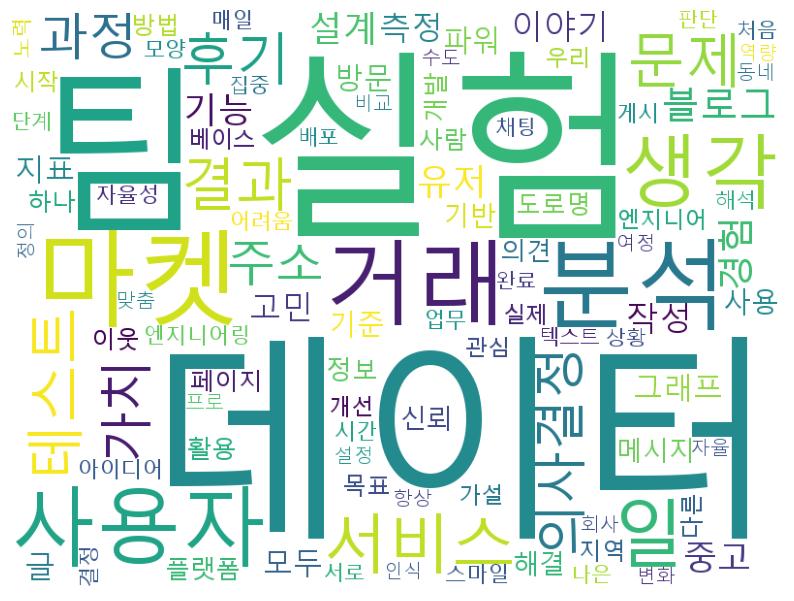

In [82]:
make_wordcloud(100,text_dan)